<a href="https://colab.research.google.com/github/rickvelloso/Learning-IA/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Para não ter que importar a lib inteira e lidar com versionamento, estou usando o código fonte dos módulos e importando diretamente nos arquivos de dados.

In [2]:
from hopkins import *
from metric import *
from visual_assessment_of_tendency import *

Desabilita avasisos de erro para não poluir saídas.

In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Criando clusters, um com iris e outro com uma matriz qualquer gerada aleatoriamente, dessa forma poderemos compara-los.


In [4]:
iris = datasets.load_iris()
clust1 = scale(iris.data)
clust2 = scale(np.random.rand(150,4))

Gerando gráfico de elbow para identificar o número de clusters.

<function matplotlib.pyplot.show(close=None, block=None)>

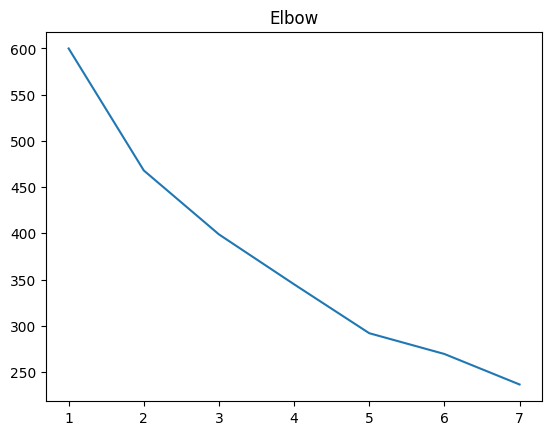

In [8]:
inertia = []
for i in range(1,8):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(clust2)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,8), inertia)
plt.title("Elbow")
plt.show

#com os dados de IRIS (clust1) o gráfico de elbow
#recomendou a utilização de 3 clusters.

#enquanto com os dados gerados aleatorios (clust2)
#recomendou algo proximo de 5.

Gerando estatística de hopkins, número esse que quanto mais próximo de 0 = mais próximo de haver agrupamentos, enquanto mais próximo de 1 = mais provavel de estar distribuido aleatoriamente.
Valores intermediarios mostram não haver estrutura clara.

In [9]:
hopkins(clust1,150)

np.float64(0.1756910934498679)

Na comparação os dados de Iris ficaram mais próximos de 0 (0.17) enquanto os gerados aleatoriamente ficaram mais proximos do 1 (0.51) e mostrando não haver padrão em seus dados. O que é esperado.

In [10]:
hopkins(clust2,150)

np.float64(0.5157099961352266)

Agora gerando os gráficos de visualização vat para ambos os clusters:

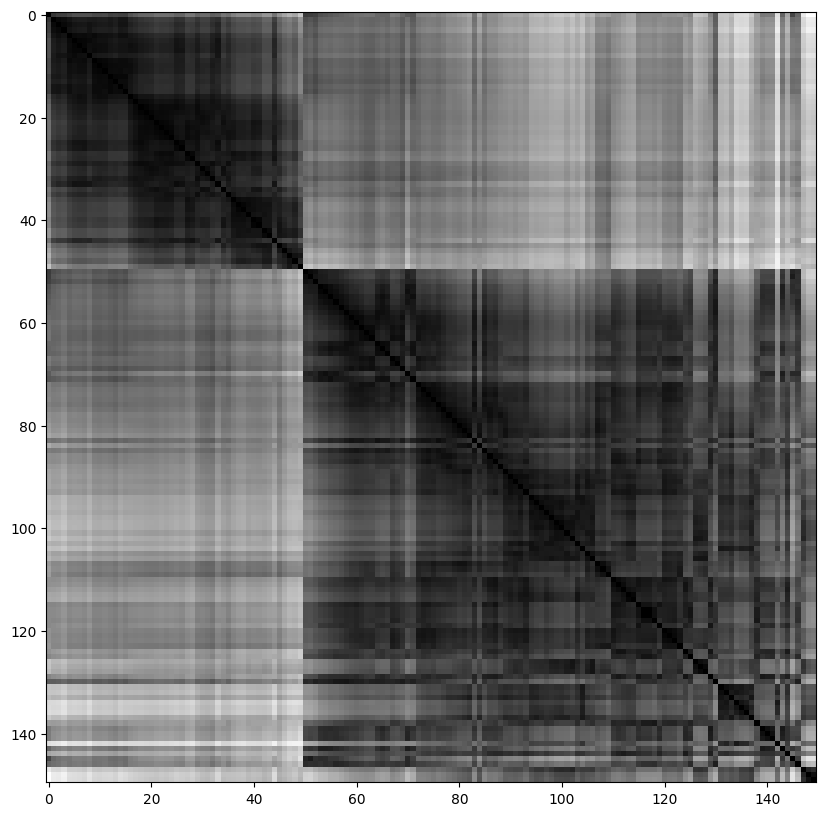

In [11]:
vat(clust1)

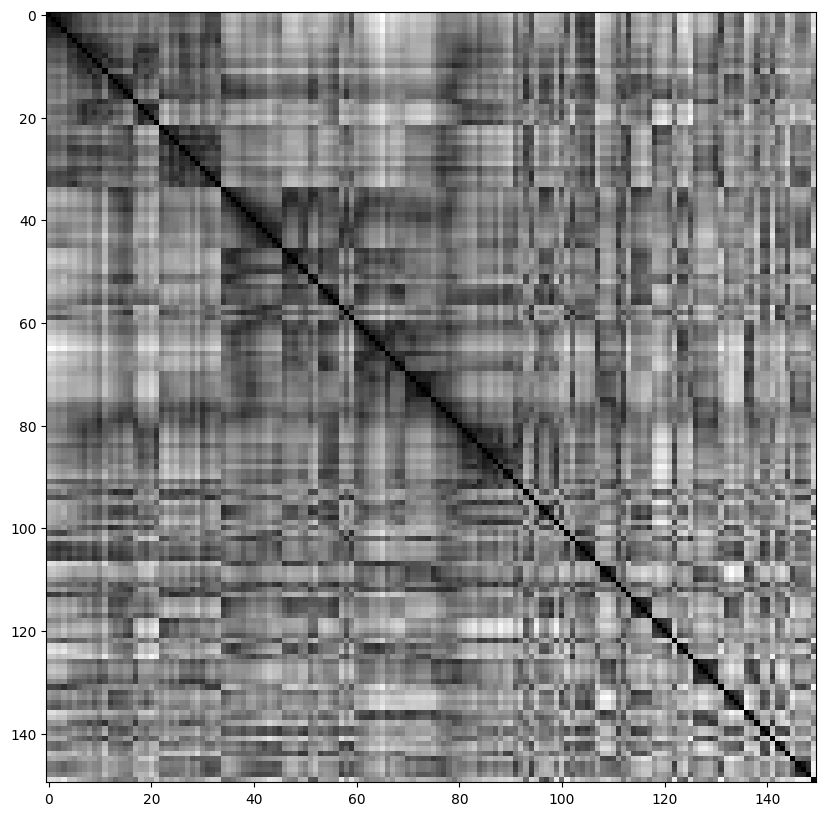

In [12]:
vat(clust2)

Como podemos ver nas imagens, o cluster de iris é muito mais agrupado e com um padrão, enquanto o clust2 é completamente aleatorio. O que volta a reforçar a métrica de hopkins.
Pode-se também utilizar o ivat para visualizar graficamente, de maneira talvez mais clara.

Agora vamos utilizar diferentes métricas (silhouette, davies_bouldin e cailinski_harabasz) para calcular o número ideal de clusters.

In [15]:
m1 = assess_tendency_by_metric(clust1,'silhouette',5)
print(m1)

(np.int64(2), array([0.58175005, 0.45653523, 0.41511335, 0.34590128]))


In [16]:
m2 = assess_tendency_by_metric(clust1,'davies_bouldin',5)
print(m2)

(np.int64(2), array([0.59331269, 0.83241621, 0.92236488, 0.95421252]))


In [18]:
m3 = assess_tendency_by_metric(clust1,'calinski_harabasz',5)
print(m3)

(np.int64(2), array([251.34933946, 241.31556059, 206.2286231 , 169.51505023]))


Unanimdade para 2 clusters com o iris, agora iremos ao clust2.

In [19]:
m1 =  assess_tendency_by_metric(clust2,'silhouette',5)
print(m1)

(np.int64(2), array([0.20488059, 0.19429563, 0.19864993, 0.18254993]))


In [20]:
m2 = assess_tendency_by_metric(clust2,'davies_bouldin',5)
print(m2)

(np.int64(5), array([1.80081758, 1.59893512, 1.44540292, 1.27570819]))


In [21]:
m3 = assess_tendency_by_metric(clust2,'calinski_harabasz',5)
print(m3)

(np.int64(2), array([42.37546551, 40.47990353, 35.62370946, 36.25685596]))


Aqui já não houve a mesma unanimidade, o que faz sentido, visto que é uma matriz gerada aleatoriamente.

Agora vamos usar a função que ja busca o valor médio dos 3 metodos testados acima, para não ter que testar métrica a métrica.

In [22]:
m = assess_tendency_by_mean_metric_score(clust1,5)
print(m)
m = assess_tendency_by_mean_metric_score(clust2,5)
print(m)

2.0
3.0
